In [9]:
# Import dependencies
install.packages("deSolve")
require(deSolve)
require(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:

# Function to create SIR model
sir_model <- function(time, initial_pop, params){

  S = initial_pop[1]
  I = initial_pop[2]
  R = initial_pop[3]

  with(as.list(params),{

    N = S+I+R
    dS = -S*beta*I/N
    dI = S*beta*I/N - gamma*I
    dR = gamma*I

    return(list(c(dS, dI, dR)))
  })
}

# Input parameters
beta <- 0.7
gamma <- 0.1
my_params <- c(beta = beta, gamma = gamma)
initial_pop <- c(S = 999999, I = 1, R = 0)
time <- seq(from = 0, to = 150, by = 1)

# Run model
my_sir <- ode(initial_pop, time, sir_model, my_params)

# Convert results to data frame
my_sir <- as.data.frame(my_sir)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


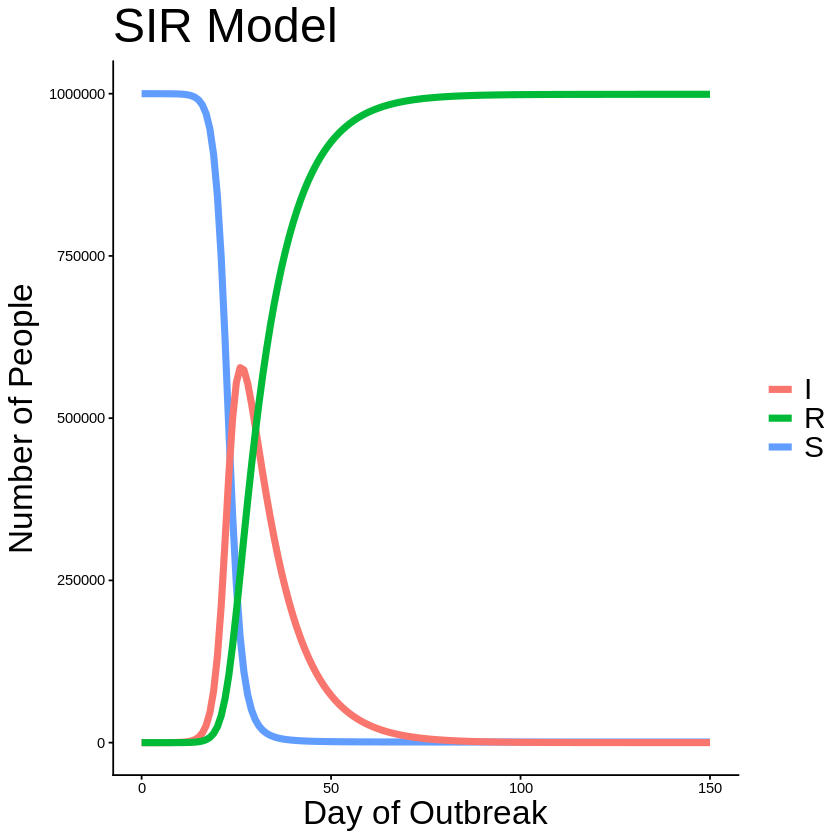

In [11]:
# Plot Outbreak
ggplot()+
  geom_line(data=my_sir,
               aes(x=time, y = S, color = 'S'), size = 2)+
  geom_line(data=my_sir,
            aes(x=time, y = I, color = 'I'), size = 2)+
  geom_line(data=my_sir,
            aes(x=time, y = R, color = 'R'), size = 2)+
  xlab('Day of Outbreak')+
  ylab('Number of People')+
  ggtitle(paste0('SIR Model'))+
  theme_classic()+
  theme(legend.title=element_blank(), axis.title = element_text(size = 20),
        title = element_text(size = 24), legend.text = element_text(size = 18))

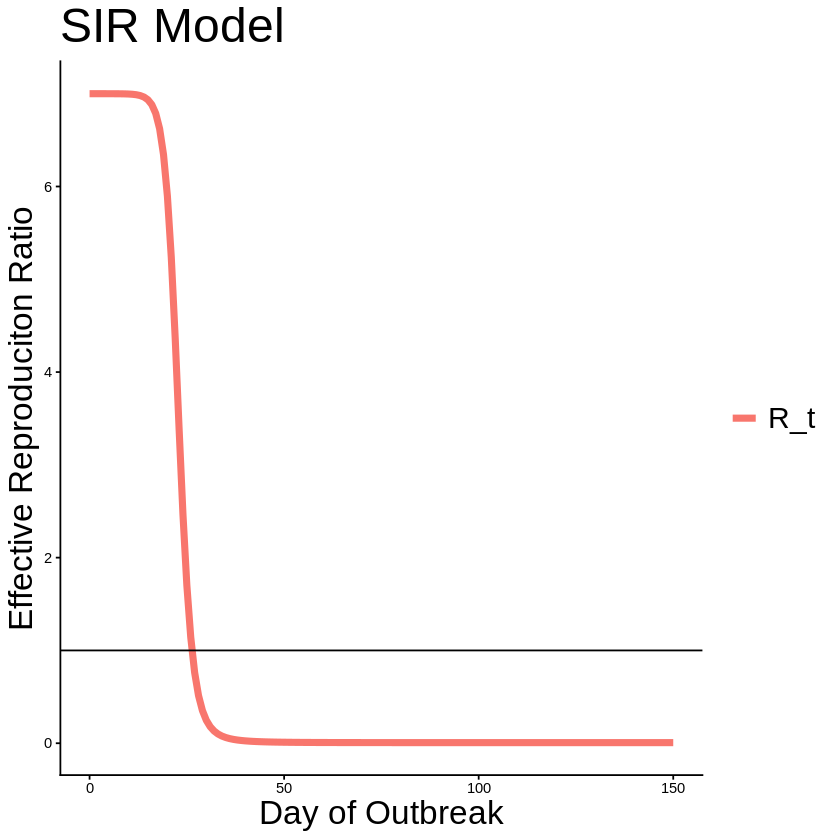

In [12]:
# Effective Reproduction Ratio
my_sir$R_t <- beta*my_sir$S / (gamma * (my_sir$S + my_sir$I + my_sir$R))

# Plot R_t
ggplot()+
  geom_line(data=my_sir,
            aes(x=time, y = R_t, color = 'R_t'), size = 2)+
  geom_hline(yintercept = 1)+
  xlab('Day of Outbreak')+
  ylab('Effective Reproduciton Ratio')+
  ggtitle(paste0('SIR Model'))+
  theme_classic()+
  theme(legend.title=element_blank(), axis.title = element_text(size = 20),
        title = element_text(size = 24), legend.text = element_text(size = 18))

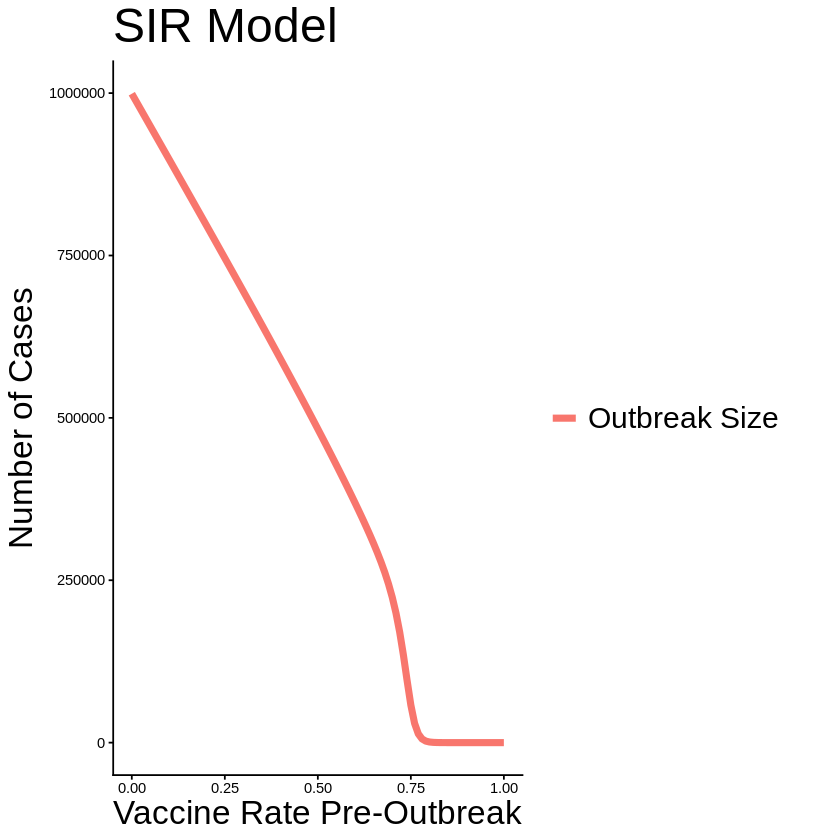

In [13]:
# Vaccination
# Track total cases in outbreak
total_cases_list <- c()
vax_rate_list <- seq(0,1,by=0.01)
pop <- 999999

for(vax_rate in vax_rate_list)
{
  initial_pop <- c(S = pop*(1-vax_rate), I = 1, R = pop*vax_rate)

  # Run model
  my_sir <- ode(initial_pop, time, sir_model, my_params)

  # Convert results to data frame
  my_sir <- as.data.frame(my_sir)

  #Add total cases to list
  total_cases_list <- c(total_cases_list,
                        (my_sir$R[length(my_sir$R)] - pop*vax_rate))
}

#Plot Vaccination Rate Vs Outbreak Size
vax_plot_df <- as.data.frame(matrix(c(vax_rate_list, total_cases_list),
                                    ncol = 2, byrow = FALSE))
colnames(vax_plot_df) <- c('Vax_rate', 'Outbreak_size')

# Plot R_t
ggplot()+
  geom_line(data=vax_plot_df,
            aes(x=Vax_rate, y = Outbreak_size, color = 'Outbreak Size'), size = 2)+
  xlab('Vaccine Rate Pre-Outbreak')+
  ylab('Number of Cases')+
  ggtitle(paste0('SIR Model'))+
  theme_classic()+
  theme(legend.title=element_blank(), axis.title = element_text(size = 20),
        title = element_text(size = 24), legend.text = element_text(size = 18))